In [1]:
import matplotlib.pyplot as plt
import numpy as np
import diagnostics
import numpy.ma as ma

In [2]:
exp = diagnostics.plume('../../data/Nyles/forced_plume_32z/', 'forced_plume_32z')

Text(0.5, 0, 'time (hours)')

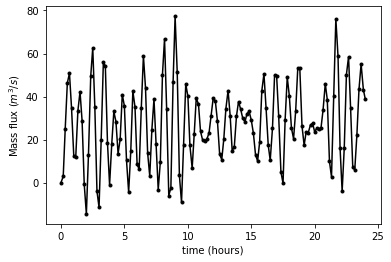

In [3]:
mass_flux = exp.Flux('mass', 0.2, 0.5)
plt.plot(exp.time/3600, mass_flux, 'k.-')
plt.ylabel('Mass flux ($m^3/s$)')
plt.xlabel('time (hours)')

In [4]:
variables = exp.read_vars(['x', 'y', 'z', 'w'])

x = variables['x']
y = variables['y']
z = variables['z']

XZ, ZX = np.meshgrid(x/exp.params['Lx']-0.5, z/exp.params['Lz'])
XY, YX = np.meshgrid(x/exp.params['Lx']-0.5, y/exp.params['Ly'])

/Users/claudiopierard/miniconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/Users/claudiopierard/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


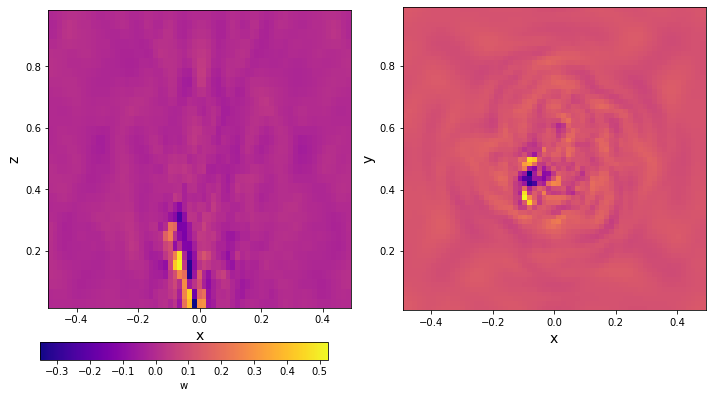

In [5]:
field = variables['w']#/62.5
exp.params['Lx']

n = 70
maxx = 10
minn = -10

fig = plt.figure(figsize=(10,5), tight_layout=True)
ax1 = plt.subplot(121, aspect='equal')
im = ax1.pcolormesh(XZ, ZX, field[n, :, 32, :], cmap='plasma')#, vmax=maxx, vmin=minn)
#ax1.text(2700, 2100, f't = {t[n]/3600:.2f} h', c='black', fontsize=14)
#ax1.text(200, 2100, f'y = {y[32]:.0f} m', c='black', fontsize=14)
ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('z', fontsize=14)

ax2 = plt.subplot(122)
ax2.pcolormesh(XY, YX, field[n, 10, :, :], cmap='plasma')#,  vmax=maxx, vmin=minn)
#ax2.text(2650, 3600, f'z = {z[16]:.0f} m', c='white', fontsize=14)
ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('y', fontsize=14)

cbaxes = fig.add_axes([0.06, -0.01, 0.4, 0.05]) 
cb = plt.colorbar(im, cax = cbaxes, orientation='horizontal', label='w') 

#plt.tight_layout()

# Not rotation

In [6]:
no_rot = diagnostics.plume('../../data/Nyles/plume_2days_64h_non-rot/', 'plume_2days_64h_non-rot')

Text(0.5, 0, 'time (hours)')

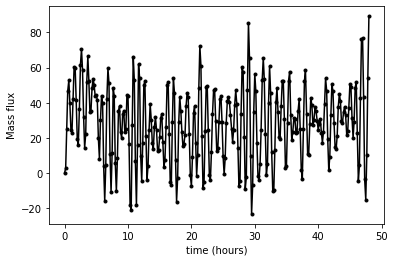

In [8]:
mass_flux = no_rot.Flux('mass', 0.2, 0.5)
plt.plot(no_rot.time/3600, mass_flux, 'k.-')
plt.ylabel('Mass flux')
plt.xlabel('time (hours)')

Text(0.5, 0, 'time (hours)')

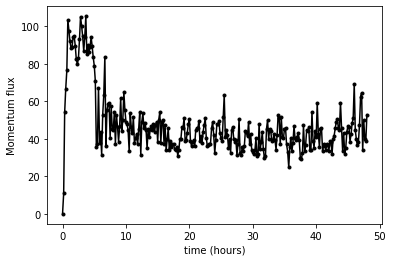

In [9]:
momentum_flux = no_rot.Flux('momentum', 0.2, 0.5)
plt.plot(no_rot.time/3600, momentum_flux, 'k.-')
plt.ylabel('Momentum flux')
plt.xlabel('time (hours)')

Text(0.5, 0, 'time (hours)')

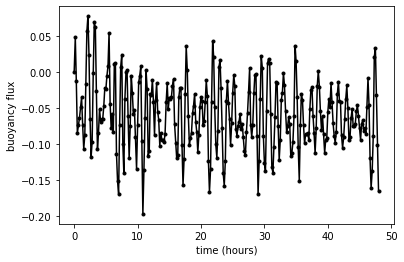

In [11]:
buoyancy_flux = no_rot.Flux('buoyancy', 0.2, 0.5)
plt.plot(no_rot.time/3600, buoyancy_flux, 'k.-')
plt.ylabel('buoyancy flux')
plt.xlabel('time (hours)')

# How to determine the max height of the plume

In [16]:
momentum_flux = no_rot.Flux_levels('momentum', 0.2)

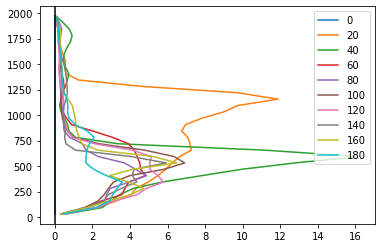

In [17]:
for t in range(0, 200, 20):
    plt.plot(momentum_flux[t], z, label=t)
    
# plt.xlim(-0.00005, 0.00005)
plt.axvline(0, color='k')
plt.legend()

In [94]:
idx = np.where(np.diff(momentum_flux[100]) < 0)
momentum_flux[100, idx]

array([[6.90721397, 6.3452105 , 4.77508212, 2.3680816 , 0.98862046,
        0.65370902, 0.51974321, 0.39761551, 0.35870064, 0.33502998,
        0.36715501, 0.35181491, 0.31283722, 0.28390363, 0.26447736,
        0.23385927, 0.20309114, 0.18557639, 0.15644135, 0.08395828]])

In [219]:
def find_z_plume(array, percent):
    array = np.asarray(array[1:])
    maximum = array.max()
    difference = np.abs(array - maximum*percent)
    idx = difference.argmin()
    return idx+1

In [220]:
nt = momentum_flux.shape[0]
z_plume = np.zeros(nt)
z_plume_2 = np.zeros(nt)
for t in range(momentum_flux.shape[0]):
    z_plume_idx = find_z_plume(momentum_flux[t], 1)
    z_plume[t] = z[z_plume_idx]
    z_plume_idx = find_z_plume(momentum_flux[t], 0.1)
    z_plume_2[t] = z[z_plume_idx]

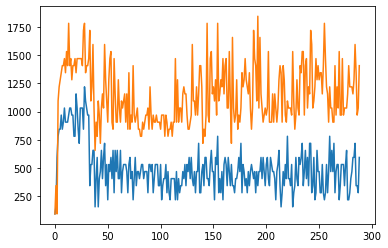

In [221]:
plt.plot(z_plume)
plt.plot(z_plume_2)

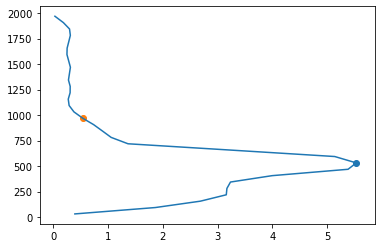

In [225]:
nt = 200
plt.plot(momentum_flux[nt],z)

M_max_idx = np.where(momentum_flux[nt] == momentum_flux[nt].max())[0]
plt.scatter(momentum_flux[nt, M_max_idx], z[M_max_idx])

z_plume_idx = find_z_plume(momentum_flux[nt], 0.1)

plt.scatter(momentum_flux[nt, z_plume_idx], z[z_plume_idx])

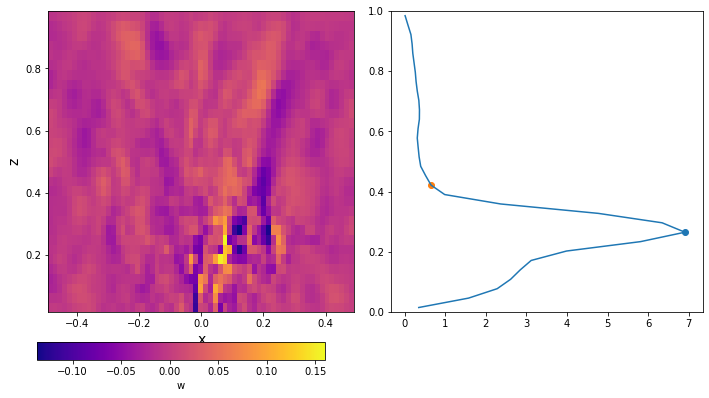

In [230]:
field = variables['w']#/62.5
exp.params['Lx']

n = 100
maxx = 10
minn = -10
Lz = 2000

fig = plt.figure(figsize=(10,5), tight_layout=True)
ax1 = plt.subplot(121, aspect='equal')
im = ax1.pcolormesh(XZ, ZX, field[n, :, 32, :], cmap='plasma')#, vmax=maxx, vmin=minn)
#ax1.text(2700, 2100, f't = {t[n]/3600:.2f} h', c='black', fontsize=14)
#ax1.text(200, 2100, f'y = {y[32]:.0f} m', c='black', fontsize=14)
ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('z', fontsize=14)

ax2 = plt.subplot(122)
ax2.plot(momentum_flux[n],z/Lz)

M_max_idx = np.where(momentum_flux[n] == momentum_flux[n].max())[0]
plt.scatter(momentum_flux[n, M_max_idx], z[M_max_idx]/Lz)
z_plume_idx = find_z_plume(momentum_flux[n], 0.1)
ax2.scatter(momentum_flux[n, z_plume_idx], z[z_plume_idx]/Lz)
ax2.set_ylim(0,1)
#ax2.pcolormesh(XY, YX, field[n, 10, :, :], cmap='plasma')#,  vmax=maxx, vmin=minn)
#ax2.text(2650, 3600, f'z = {z[16]:.0f} m', c='white', fontsize=14)
#ax2.set_xlabel('x', fontsize=14)
#ax2.set_ylabel('y', fontsize=14)

cbaxes = fig.add_axes([0.06, -0.01, 0.4, 0.05]) 
cb = plt.colorbar(im, cax = cbaxes, orientation='horizontal', label='w') 

#plt.tight_layout()

In [21]:
variables = no_rot.read_vars(['x', 'y', 'z', 'w'])

x = variables['x']/no_rot.params['Lx'] - 0.5
y = variables['y']/no_rot.params['Ly'] - 0.5
z = variables['z']/no_rot.params['Lz']

X, Y = np.meshgrid(x, y)
#XY, YX = np.meshgrid(x, y)

r = np.sqrt(X**2 + Y**2)
mask_1 = ma.masked_outside(r, 0, 0.2)

In [22]:
w = no_rot.read_vars('w')['w']
w = diagnostics.velocity_interpolation(w, axis=1)

In [23]:
new_M = ma.masked_array((w*w)[100, 5], mask_1.mask)

In [24]:
new_M.shape

(64, 64)

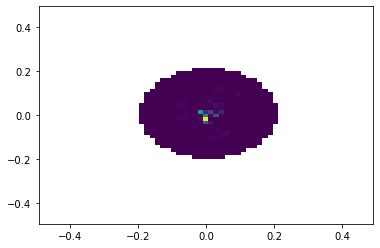

In [25]:
plt.pcolormesh(X, Y, new_M)

In [26]:
new_M[5]

masked_array(data=[--, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --],
             mask=[ True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True],
       fill_value=1e+20,
            dtype=floa

In [27]:
momentum_flux[100]

array([0.34934301, 1.57695936, 2.28204308, 2.61327408, 2.8500175 ,
       3.1194083 , 3.98937497, 5.8145799 , 6.90721397, 6.3452105 ,
       4.77508212, 2.3680816 , 0.98862046, 0.65370902, 0.51974321,
       0.39761551, 0.35870064, 0.33502998, 0.31300685, 0.33236221,
       0.36498689, 0.36715501, 0.35181491, 0.31283722, 0.28390363,
       0.26447736, 0.23385927, 0.20309114, 0.18557639, 0.15644135,
       0.08395828, 0.0134829 ])

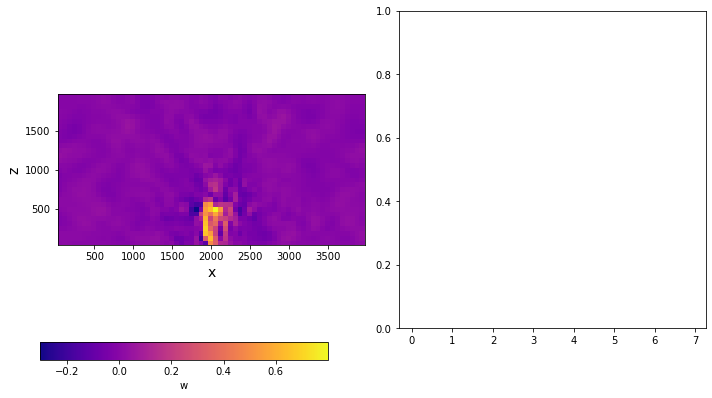

In [36]:
field = variables['w']#/62.5
exp.params['Lx']

n = 100
maxx = 10
minn = -10

fig = plt.figure(figsize=(10,5), tight_layout=True)
ax1 = plt.subplot(121, aspect='equal')
im = ax1.pcolormesh(XZ, ZX, field[n, :, 32, :], cmap='plasma')#, vmax=maxx, vmin=minn)
#ax1.text(2700, 2100, f't = {t[n]/3600:.2f} h', c='black', fontsize=14)
#ax1.text(200, 2100, f'y = {y[32]:.0f} m', c='black', fontsize=14)
ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('z', fontsize=14)

ax2 = plt.subplot(122)
ax2.plot(momentum_flux[n], z, label=t)
ax2.set_ylim(0,1)
#ax2.pcolormesh(XY, YX, field[n, 10, :, :], cmap='plasma')#,  vmax=maxx, vmin=minn)
#ax2.text(2650, 3600, f'z = {z[16]:.0f} m', c='white', fontsize=14)
#ax2.set_xlabel('x', fontsize=14)
#ax2.set_ylabel('y', fontsize=14)

cbaxes = fig.add_axes([0.06, -0.01, 0.4, 0.05]) 
cb = plt.colorbar(im, cax = cbaxes, orientation='horizontal', label='w') 

#plt.tight_layout()

In [29]:
no_rot.params['nz']

32

# checking that is not rotation

In [30]:
var_norot = no_rot.read_vars(['w', 'x', 'y', 'z'])
x = var_norot['x']
y = var_norot['y']
z = var_norot['z']
XZ, ZX = np.meshgrid(x, z)
XY, YX = np.meshgrid(x, y)

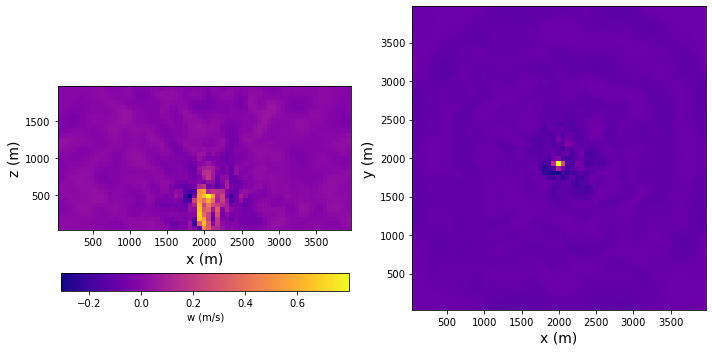

In [31]:
field = var_norot['w']

n = 100
maxx = 10
minn = -10

fig = plt.figure(figsize=(10,5), tight_layout=True)
ax1 = plt.subplot(121, aspect='equal')
im = ax1.pcolormesh(XZ, ZX, field[n, :, 32, :], cmap='plasma')#, vmax=maxx, vmin=minn)
#ax1.text(2700, 2100, f't = {t[n]/3600:.2f} h', c='black', fontsize=14)
#ax1.text(200, 2100, f'y = {y[32]:.0f} m', c='black', fontsize=14)
ax1.set_xlabel('x (m)', fontsize=14)
ax1.set_ylabel('z (m)', fontsize=14)

ax2 = plt.subplot(122)
ax2.pcolormesh(XY, YX, field[n, 10, :, :], cmap='plasma')#,  vmax=maxx, vmin=minn)
#ax2.text(2650, 3600, f'z = {z[16]:.0f} m', c='white', fontsize=14)
ax2.set_xlabel('x (m)', fontsize=14)
ax2.set_ylabel('y (m)', fontsize=14)

cbaxes = fig.add_axes([0.09, 0.18, 0.4, 0.05]) 
cb = plt.colorbar(im, cax = cbaxes, orientation='horizontal', label='w (m/s)') 

#plt.tight_layout()